<a href="https://colab.research.google.com/github/Maheshkumar-GPU/retail_demand_forecasting/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the required libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

data preprossing


In [60]:
#loading the data set to pandas dataframe
big_dataset = pd.read_csv('/Train-Set.csv')
big_dataset.head()
big_dataset.shape
big_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
#checking missing values
big_dataset.isnull().sum()
#handling missing value
big_dataset = big_dataset.fillna(0)
missing = big_dataset.isnull().sum()
print(missing)



ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64


data anaanalytics

In [32]:
# statistical meameasures of data
big_dataset.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.856333,0.066132,140.992782,1997.831867,2181.288914
std,4.226125,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.850000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


numerical weight

/tmp/ipython-input-2868474751.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_dataset['Weight'])


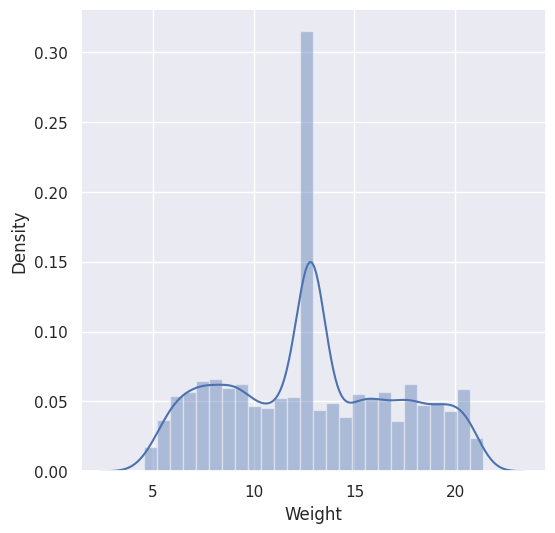

In [36]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_dataset['Weight'])
plt.show()

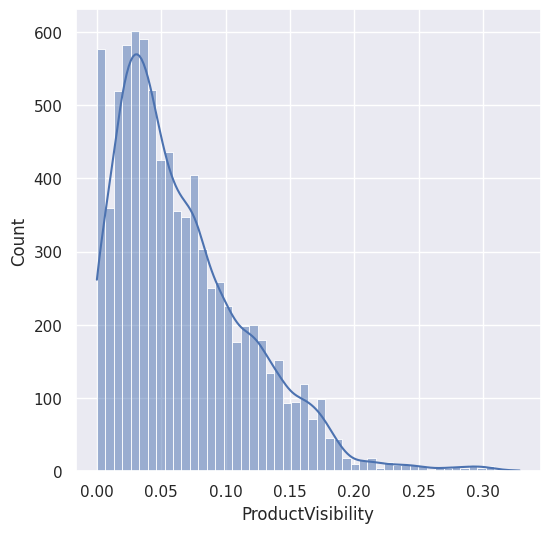

In [41]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(big_dataset['ProductVisibility'], kde=True) # Using histplot with KDE for similar functionality
plt.show()

/tmp/ipython-input-2048596283.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_dataset['MRP'])


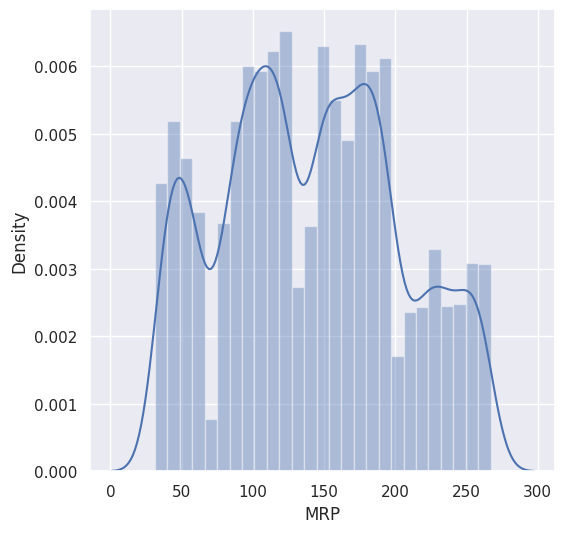

In [38]:
#  MRP distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_dataset['MRP'])
plt.show()


/tmp/ipython-input-916897520.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_dataset['EstablishmentYear'])


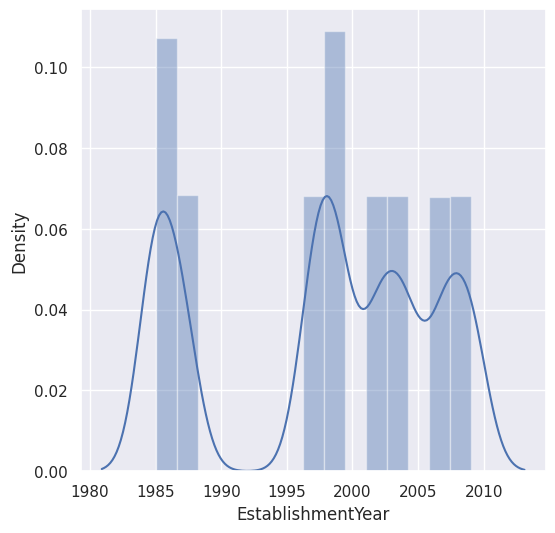

In [39]:
# EstablishmentYear  distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_dataset['EstablishmentYear'])
plt.show()


/tmp/ipython-input-284041985.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_dataset['OutletSales'])


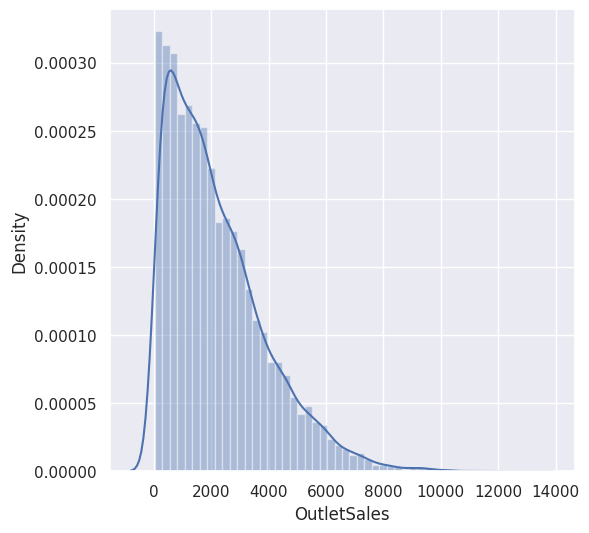

In [44]:
# OutletSales distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_dataset['OutletSales'])
plt.show()


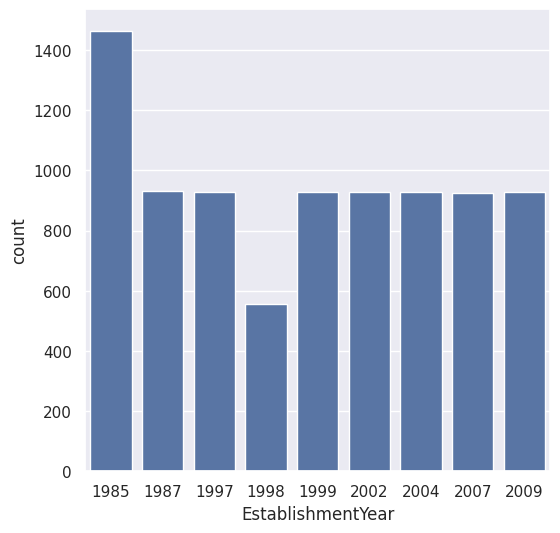

In [45]:
# EstablishmentYear count
plt.figure(figsize=(6,6))
sns.countplot(x = "EstablishmentYear",data = big_dataset)
plt.show()


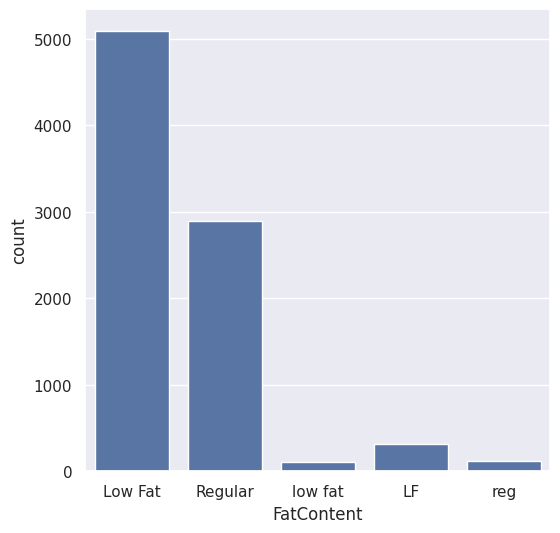

In [48]:
# FatContent column
plt.figure(figsize=(6,6))
sns.countplot(x = "FatContent",data = big_dataset)
plt.show()


In [50]:
big_dataset['FatContent'].value_counts()

,count
FatContent,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [53]:
big_dataset.replace({'FatContent':{'Low Fat':'low fat','reg':'Regular','LF':'low fat'}},inplace=True)
big_dataset['FatContent'].value_counts()

,count
FatContent,
low fat,5517
Regular,3006


In [59]:
big_dataset.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,1297,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


label encoding


In [56]:
encoder = LabelEncoder()

In [61]:
big_dataset['ProductID'] = encoder.fit_transform(big_dataset['ProductID'])
big_dataset['FatContent'] = encoder.fit_transform(big_dataset['FatContent'])
big_dataset['ProductType'] = encoder.fit_transform(big_dataset['ProductType'])
big_dataset['OutletID'] = encoder.fit_transform(big_dataset['OutletID'])
big_dataset['OutletSize'] = encoder.fit_transform(big_dataset['OutletSize'])
big_dataset['LocationType'] = encoder.fit_transform(big_dataset['LocationType'])
big_dataset['OutletType'] = encoder.fit_transform(big_dataset['OutletType'])

In [62]:
big_dataset.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


split features and target
x = features
y = target

In [66]:
x = big_dataset.drop(columns='OutletSales',axis=1)
y = big_dataset['OutletSales']
print(x)
print(y)

      ProductID  Weight  FatContent  ...  OutletSize  LocationType  OutletType
0           156   9.300           1  ...           1             0           1
1             8   5.920           2  ...           1             2           2
2           662  17.500           1  ...           1             0           1
3          1121  19.200           2  ...           3             2           0
4          1297   8.930           1  ...           0             2           1
...         ...     ...         ...  ...         ...           ...         ...
8518        370   6.865           1  ...           0             2           1
8519        897   8.380           2  ...           3             1           1
8520       1357  10.600           1  ...           2             1           1
8521        681   7.210           2  ...           1             2           2
8522         50  14.800           1  ...           2             0           1

[8523 rows x 11 columns]
0       3735.1380
1       

split training data  and testing data

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


train the  machine learning model

# using xgb regressor

In [69]:
reg = XGBRegressor()
reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

eveulating our machine learning model

In [70]:
# prediction on training data
train_data_prediction = reg.predict(x_train)
#r^2 value
r2_train = metrics.r2_score(y_train,train_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.8770463065351128


In [71]:
# prediction on testing  data
test_data_prediction = reg.predict(x_test)
#r^2 value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.5195941428937144
